['"International School of AI & Data Science" ', 'OLIVER Recruitment ', '"Reema Puri | INSAID" ', 'Google ', 'Lotus Palace ADDA ', 'Quora Digest ', 'Lotus Palace ADDA ', 'Ramanan B ', 'Team upGrad ', 'Ramanan B ', 'Projects at 99acres ', 'Projects at 99acres ', 'Lotus Palace ADDA ', '"Reema Puri | INSAID" ', 'Reddit ', '"Amazon.in" ', 'Everything ', 'HDFC Bank ', 'HDFC Bank ', 'Reddit ', 'Avast ', 'LinkedIn ', '"academics @INSAID" ', 'Lotus Palace ADDA ', '"GOG.COM" ', 'HDFC Bank InstaAlerts ', 'HDFC Bank InstaAlerts ', 'Naukri ', 'LinkedIn ', 'ADDA ']


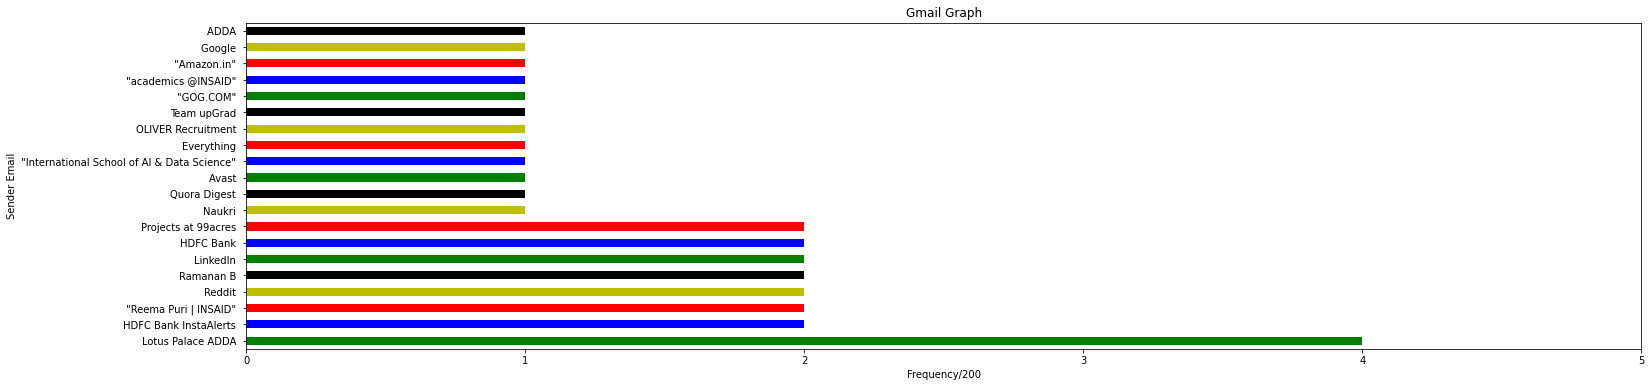

In [11]:
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow 
from google.auth.transport.requests import Request 
import pickle 
import os.path
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import base64 
import email 
from bs4 import BeautifulSoup
from PIL import Image, ImageDraw

SCOPES = ['https://www.googleapis.com/auth/gmail.readonly']


def getEmails():
    global senderlist
    senderlist = []
    # Variable creds will store the user access token.
    # If no valid token found, we will create one.
    creds = None

    # The file token.pickle contains the user access token.
    # Check if it exists
    if os.path.exists('token.pickle'):
        # Read the token from the file and store it in the variable creds
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)

            # If credentials are not available or are invalid, ask the user to log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)

            # Save the access token in token.pickle file for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

            # Connect to the Gmail API
    service = build('gmail', 'v1', credentials=creds)

    # request a list of all the messages
    result = service.users().messages().list(userId='me').execute()

    # We can also pass maxResults to get any number of emails. Like this:
    result = service.users().messages().list(maxResults=30, userId='me').execute()
    messages = result.get('messages')

    # messages is a list of dictionaries where each dictionary contains a message id.

    # iterate through all the messages
    for msg in messages:
        # Get the message from its id
        txt = service.users().messages().get(userId='me', id=msg['id']).execute()

        # Use try-except to avoid any Errors
        try:
            # Get value of 'payload' from dictionary 'txt'
            payload = txt['payload']
            headers = payload['headers']

            # Look for Subject and Sender Email in the headers
            for d in headers:
                if d['name'] == 'Subject':
                    subject = d['value']
                if d['name'] == 'From':
                    sender = d['value']
                    a=int(sender.find('<'))
                    st=sender[:a]
                    senderlist.append(st)

            '''
                    # The Body of the message is in Encrypted format. So, we have to decode it.
            # Get the data and decode it with base 64 decoder.
            parts = payload.get('parts')[0]
            data = parts['body']['data']
            data = data.replace("-", "+").replace("_", "/")
            decoded_data = base64.b64decode(data)

            # Now, the data obtained is in lxml. So, we will parse
            # it with BeautifulSoup library
            soup = BeautifulSoup(decoded_data, "lxml")
            body = soup.body()

            # Printing the subject, sender's email and message
            
            print("Subject: ", subject)
            print("From: ", sender)
            print("Message: ", body)
            print('\n')
        '''

        except:
            pass


getEmails()
print(senderlist)
df = pd.DataFrame (senderlist,columns=['Sender'])
ax = df['Sender'].value_counts().plot(kind='barh',
                                    color=tuple(["g", "b","r","y","k"]),
                                    xticks=np.arange(0,6,1),
                                    figsize=(25,6),
                                    title="Gmail Graph",stacked=True)
ax.set_ylabel("Sender Email")
ax.set_xlabel("Frequency/200")
plot.savefig('Gmail_graph.pdf', dpi=300)